# Probability Distributions


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### a) Uniform Distribution

*Uniform distribution* describe random experiments where each possible outcome has the same probability of occurring.

For instance, rolling a dice or flipping a coin are uniform distributions.

$$\begin{cases} \frac{1}{b-a}, & \mbox{if } a\leq x \leq b \\ 0, & \mbox{otherwise } \end{cases}$$



In [57]:
from scipy.stats import uniform
n = 100000
a= 5
width=5
data_uniform = uniform.rvs(size=n, loc = a, scale=width)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

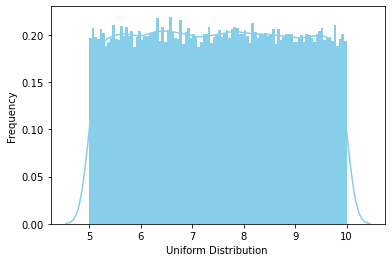

In [58]:
import seaborn as sns
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

From the plot that the distribution thake the value of 0.20=(1/10-5) between 5-10 and return 0 otherwise

### b) Gaussian distribution

In *Gaussian distribution* or *Normal distribution* their shape looks like a bell: there is a peak of probability that decreases when you move off.

The formula of Gaussian distribution:

$$N(X=x;\mu,\sigma^2)= \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(x-\mu)^2}$$

The distribution is a function of x, which is an outcome of the random variable X.

the part of equation $\frac{1}{\sqrt{2\pi\sigma^2}}$ is used to normalize the curve so that the total area under the curve is equal to one.

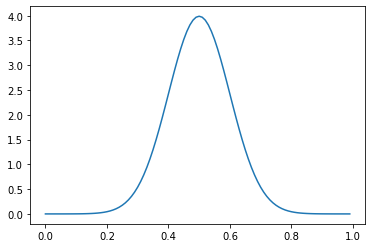

In [59]:
import math
def gaussian(x, mu, sig):
    return (1./(sig*(math.sqrt(2*math.pi))))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x_axis = np.arange(0,1,0.01)
y_axis = gaussian(x_axis,0.5,0.1)
plt.plot(x_axis,y_axis)

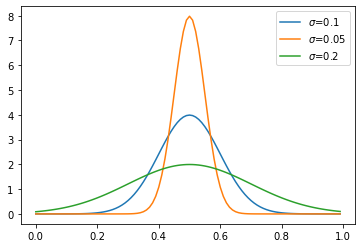

In [74]:
x_axis = np.arange(0,1,0.01)
y_axis = gaussian(x_axis,0.5,0.1)
plt.plot(x_axis,y_axis,label='$\sigma$=0.1')
x_axis = np.arange(0,1,0.01)
y_axis = gaussian(x_axis,0.5,0.05)
plt.plot(x_axis,y_axis,label='$\sigma$=0.05')
x_axis = np.arange(0,1,0.01)
y_axis = gaussian(x_axis,0.5,0.2)
plt.plot(x_axis,y_axis,label='$\sigma$=0.2')
plt.legend();

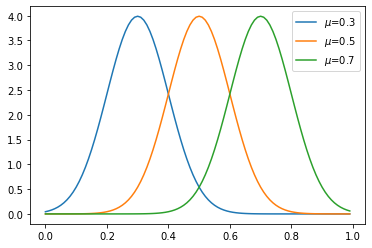

In [76]:
x_axis = np.arange(0,1,0.01)
y_axis = gaussian(x_axis,0.3,0.1)
plt.plot(x_axis,y_axis,label='$\mu$=0.3')
x_axis = np.arange(0,1,0.01)
y_axis = gaussian(x_axis,0.5,0.1)
plt.plot(x_axis,y_axis,label='$\mu$=0.5')
x_axis = np.arange(0,1,0.01)
y_axis = gaussian(x_axis,0.7,0.1)
plt.plot(x_axis,y_axis,label='$\mu$=0.7')
plt.legend();

The Gaussian function satisfies the requierements of probability distributions.

It return only non-negative outputs:

$$N(X=x;\mu,\sigma^2)\geq0$$

The total area under the curve (corresponding to total probability) is equal to 1:

$$\int_{-\infty}^{\infty}N(X=x;\mu,\sigma^2)dx =1$$

### c) Bernoulli Distribution

*Bernoulli Distribution* describes binary experiments where outcomes can only be 0 or 1 (such as a coin flip). This distribution has a single parameter $\mu$ with $0\leq \mu \leq 1$.

$$P(X=1;\mu) = \mu$$

This mean that the probability that the random variable X takes the value 1 is equal to $\mu$.

The probability thet the random variable X takes the value 0 correspond to $1-\mu$

The Bernoulli probability distribution can encode both of these probabilities in a single expression (The Bernoulli probability distribution):

$$Bern(X=x;\mu)=\mu^x(1-\mu)^{1-x}$$

We check for the two possible outcomes 0 and 1:

$$Bern(X=x;\mu)=\mu^0(1-\mu)^{1-0} = 1 \cdot (1-\mu)=1-\mu$$

$$Bern(X=x;\mu)=\mu^1(1-\mu)^{1-1} = \mu$$

You can also check that the sum of the probabilities is equal to 1:

$$\sum_{x=0}^{1}Bern(X=0;\mu) + Bern(X=1;\mu)$$

$$=1-\mu+\mu$$

$$=1$$

### d) Binomial distribution

You can use *Binomial distributions* when a binary experiment is ran multiple times. You can use the binomial distribution to answer questions like: "What is the probability of getting 'heads' twice if you flip a coin three times?". Bernoulli distributions are a special case of binomial distributions, when the experiment is ran once.

The binomial distribution is defined as:

$$Bin(m;N,\mu) = \binom{N}{m}\mu^m(1-\mu)^{N-m}$$

The *binomial distribution* gives the probability of getting *m* positive outcome over *N* trials.

As with Bernoulli distribution, $\mu$ is the parameter corresponding to the probability to get the positive outcome(such as 'heads'). $\mu^m$ encodes the probability of getting m positive outcome. $(1-\mu)^{N-m}$ encodes the probabilities for the remaining trials.

Note that with $\mu(1-\mu)^{N-m}$ you don't consider the fact that multiple combinations are possible. This is the purpose of $\binom{N}{m}$

$$Bin(m;N,\mu) =\frac{N!}{(N-m)!m!} \quad for \, m \leq N$$

*N!* refers to multiplying the number by itself minus one until you reach one. For instance, $4!=4 \cdot 3 \cdot 2 \cdot 1$ note that 0!=1 by convection 

In [77]:
def binomial_coeff(N,m):
    return np.math.factorial(N)/(np.math.factorial(N-m)*(np.math.factorial(m)))

In [87]:
binomial_coeff(3,2)

3.0

This means that there are 3 possible ways to get two 'heads' with 3 flips. all possible outcomes are: HHH, HHT, HTH, THH, HTT,THT,TTH or TTT. So the possible combinations for 2 heads ar(HHT,HTH,THH) = 3

In [79]:
def binomial(m,N,mu):
    return binomial_coeff(N,m) * (mu**m) * ((1-mu)**(N-m))

In [90]:
binomial(m=2,N=3,mu=0.5)

0.375

So we can say that the probability to have exactly 2 heads flipping a coin 3 times is 0.375

We can also use the function binom.pmf from the scipy.stats module

In [83]:
from scipy.stats import binom

binom.pmf(2,3,0.5)

0.375

Now we can calculate the probability of getting various numbers of 'heads' for, say 100 trials (100 coin flips).

Text(0, 0.5, 'Probability')

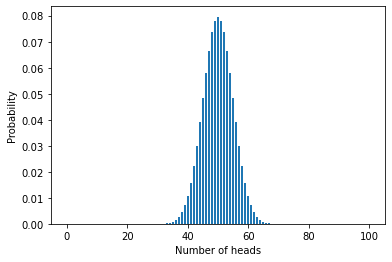

In [99]:
N=100
all_binomial_proba = np.zeros(N+1)
for i in range(N+1):
    all_binomial_proba[i] = binom.pmf(i,N,0.5)

plt.bar(np.arange(len(all_binomial_proba)),all_binomial_proba,width=0.7)
plt.xlabel('Number of heads')
plt.ylabel('Probability')

You have a large probability to get around 50 'heads'(because the probability is 0.5). This probability decreases for a smaller or larger number of 'heads'. For instance, it is quite not probable to get 70 'heads' over the 100 trials.

You can see that when the number of trials is large enough, the distribution looks like the normal distribution. 

### e) Poisson Distribution

*Poisson* is a discrete distribution function describing the probability that an event will occur a certain number of times in a fixed time (or space) interval. It is used to model count-based data, like number of emails arriving in your mailbox in one hour.

The Poisson distribution is parametrized by the expected number of events $\lambda$ in a time or space windows. The distribution is a function that takes the number of occurrences of the event as input(k) and outputs the corresponding probability (the probability that there are *k* events occurring).

$$Poi(k;\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}$$

for *k* = 0,1,2,...

The formula of $Poi(k;\lambda)$ returns the probability of observing *k* events given the parameter $\lambda$ which corresponds to the expected number of occurrences in that time slot.

As Example Priya is recording birds in a national park, using a microphone placed in a tree. She is counting the number of times a bird is recorded singing and wants to model the number of birds singing in a minute. She assume independence of detected birds.

Looking at the data of the las few hours she observes that in average, there are 2 birds detected in an interval of one minute. So $\lambda = 2$. Her goal is to know the probability thet a specific number of birds will sing in the next minute.

In [100]:
def poisson_distribution(k,lambd):
    return (lambd**k * np.exp(-lambd))/np.math.factorial(k)

For instance, the probability that 5 birds will sing in the next minute is around 0.036 (3.6%).

In [113]:
poisson_distribution(k=5,lambd=2)

0.03608940886309672

Let's plot the distribution for various values of k:

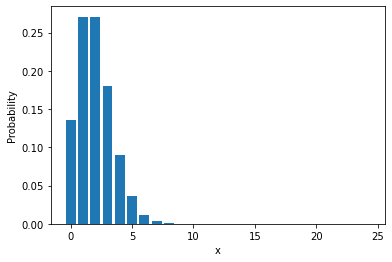

In [117]:
lambd=2

k_axis = np.arange(0,25)
distribution = np.zeros(k_axis.shape[0])
for i in range(k_axis.shape[0]):
    distribution[i] = poisson_distribution(i,lambd)
    
plt.bar(k_axis,distribution)
plt.xlabel('x')
plt.ylabel('Probability');

We can see that is most probable hear 1 or 2 birds sinning in the next minute.

Now we can plot the function for different values of $\lambda$:

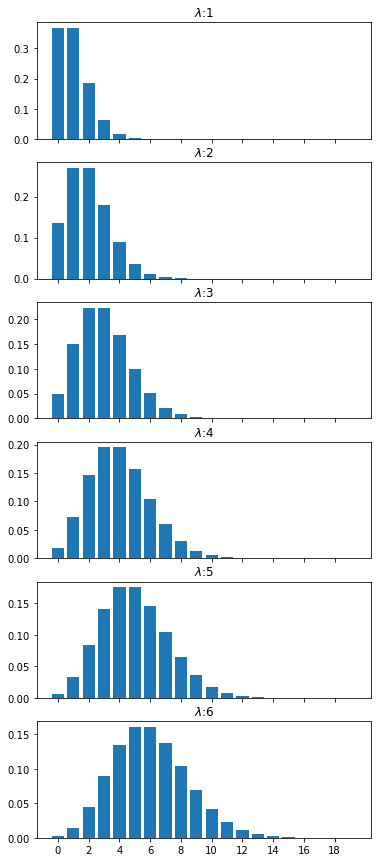

In [124]:
f, axes = plt.subplots(6,figsize=(6,15), sharex=True)

for lambd in range(1,7):
    
    k_axis= np.arange(0,20)
    distribution = np.zeros(k_axis.shape[0])
    for i in range(k_axis.shape[0]):
        distribution[i] = poisson_distribution(i,lambd)
    
    axes[lambd-1].bar(k_axis,distribution)
    axes[lambd-1].set_xticks(np.arange(0,20,2))
    axes[lambd-1].set_title(f"$\lambda$:{lambd}")

### f) Exponential Distribution

*Exponential distribution* is the amount of time between two occurrences, where you still assume that the events are independent.

The probability density function of exponential distributions is mathematically expressed as:

$$\begin{cases} \lambda e^{-\lambda x}, & x\geq 0 \\ 0, & x \leq 0 \end{cases}$$

The value $\lambda$ before the exponent tells you the starting point of the decay. This expression can be derived from Poisson distribution.

The *Poisson distribution* describes the probability that the event will occur k times in one unit of time.

$$Poi(k;\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}$$

Exponential distribution, on the other hand can describe the waiting time between events. We can reformulate as: "What is the probability that zero event will occur in this interval?" This corresponds to a Poisson distribution with k=0

$$Poi(0;\lambda)=\frac{\lambda^0 e^{-\lambda}}{0!} = e^{-\lambda}$$

Since events are assumed to be independent, the probability that no event will occur in 2 units of time is $e^{-\lambda} \cdot e^{-\lambda}$. So the probability that no event occurs in x unit of times would be $e^{-\lambda x}$. $1 - e^{-\lambda x}$ is the cumulative distribution function corresponding to the probability that an event will occur in at least x time units. **Since probability distribution functions are derivatives of cumulative distribution function, the exponential probability distribution function is the derivative of $1 - e^{-\lambda x}$ with respect to x.**
$$\lambda e^{-\lambda x}$$

Now visualize the Effects of $\lambda$

In [126]:
def exponential(x,lambd):
    return lambd * np.exp(-lambd*x)

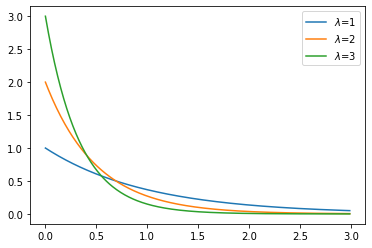

In [142]:
x_axis = np.arange(0,3,0.01)
for i in np.arange(1,4,1):
    plt.plot(x_axis,exponential(x_axis,i),label="$\lambda$="+str(i))
    plt.legend()

A large $\lambda$ corresponds to fast decay. if $\lambda$ is large it will take less time to have at least one event.

### Project: Waiting for the Bus

Use the exponential distribution to model how long we would wait the bus. From the bus timetables of bus route we focuses on a 12-hour time interval (from 8 am to 8 pm). we read that there are 48 buses in this time period, corresponding to an average of 4 buses per hour.

We'll create an array with random samples drawn from a uniform distribution to simulate the buses arriving at the stop station. 

In [143]:
t = 12
n_obs = 48
points_in_time = np.random.uniform(0,t,n_obs)
points_in_time

array([ 5.92376783,  7.61332061,  5.23647303,  5.49891902,  7.99592729,
        8.3458381 ,  2.97073397,  6.50433498,  6.72163968,  4.43447845,
        0.80699515,  1.29361656, 11.77296283,  0.14280896, 10.90614528,
        2.90654286,  2.71267519, 10.88517701, 10.02883337, 11.53573341,
       10.29124075,  7.30671913,  1.39049545,  3.04543729,  3.69752796,
        3.95589078,  1.30327981, 10.49298016,  7.13185909,  1.29347409,
        5.66706339,  8.00056157, 10.50863325,  5.41736599,  0.11774187,
        7.56591425,  2.08571425, 11.53513886, 10.7707918 , 11.1814827 ,
        4.91141175, 10.27808671, 11.80556424,  4.40244601,  0.12423429,
        5.05526232,  9.62940577, 10.23891413])

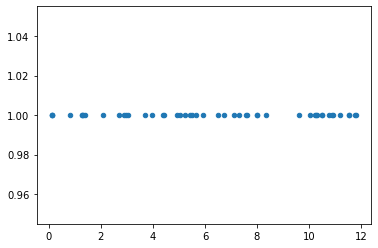

In [145]:
plt.scatter(points_in_time,np.repeat(1,points_in_time.shape[0]), s=20)

The waiting time corresponds to the difference between two points. To model these waiting times you need to calculate the time between each point. To do that, let's sort the array and calculate the differences between each point and the one before:

In [180]:
points_in_time = np.sort(points_in_time)
diff = points_in_time[1:] - points_in_time[:-1]

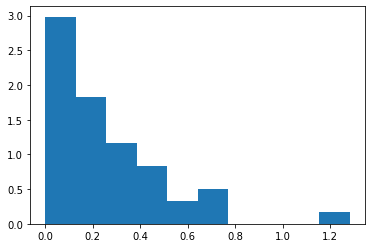

In [187]:
hist = plt.hist(diff, bins=10,density=True)

You can see that the distribution of the distribution of waiting times is characterized by more values around 0 and rapid decay. This shape is actually the shape of an exponential function. It shows that an exponential function can describe the duration between occurrences of an event.